In [46]:
import numpy as np
from skimage import io
import util as ut

# Lineare Nachbarschaftsfilter

### Teil 1

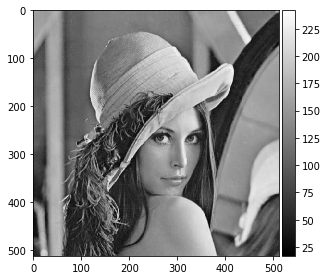

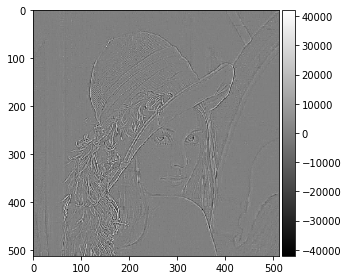

In [57]:
def filter1(in_image, filter, off):
    copy_img = in_image.copy()
    width = copy_img.shape[0]
    height = copy_img.shape[1]
 # Faltungsfunktion
    for v in range(off, height - off):
        for u in range(off, width - off):
            # fill the pixel vector P for filter position u,v)
            sum = 0
            for j in range(0, filter.shape[0]):
                for i in range(0, filter.shape[1]):
                    c = filter[i][j]
                    p = copy_img[u + (i - int(filter.shape[0] / 2))][v + (j - int(filter.shape[1] / 2))]
                    sum = sum + c * p
            # sort the pixel vector and take center element
            q = int(sum)
            in_image[u][v] = q
    return in_image


# read img
img_1 = io.imread("A3/lena.jpg")

# convert to grayscale
img_1 = ut.rgb2gray(img_1)

fm = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
]) / 8

fm_2 = np.array([
    [1, 1, 1],
    [1, 3, 1],
    [1, 1, 1]
]) / 11

# plot img
ut.printImage(img_1)

# plot imgOut
imgOut_1 = filter1(img_1, fm , 1)
ut.printImage(imgOut_1)


### Teil 2

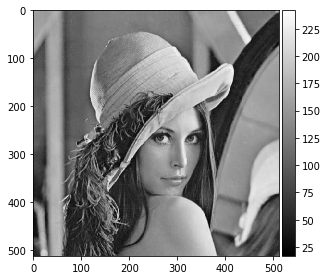

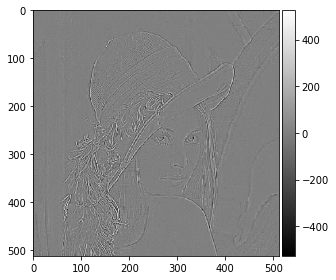

In [50]:
def filter2(in_image, filter, off, edge='none'):
    copy_img = in_image.copy()
    width = copy_img.shape[0]
    height = copy_img.shape[1]
 
    for v in range(off, height - off):
        for u in range(off, width - off):
            # fill the pixel vector P for filter position u,v)
            sum = 0
            for j in range(0, filter.shape[0]):
                for i in range(0, filter.shape[1]):
                    c = filter[i][j]
                    a_idx = u + (i - int(filter.shape[0] / 2))
                    b_idx = v + (j - int(filter.shape[1] / 2))
                    if a_idx >= 0 and a_idx < width and b_idx >= 0 and b_idx < height:
                        p = copy_img[a_idx][b_idx]
                    else:
                        if edge.__eq__('min'):
                            p = 0
                        elif edge.__eq__('max'):
                            p = 255
                        elif edge.__eq__('continue'):
                            if a_idx < 0:
                                a_idx = 0
                            elif a_idx >= width:
                                a_idx = width - 1
                            if b_idx < 0:
                                b_idx = 0
                            elif b_idx >= height:
                                b_idx = height - 1
                            p = copy_img[a_idx][b_idx]
                        else:
                            p = copy_img[a_idx][b_idx]

                    sum = sum + c * p
            # sort the pixel vector and take center element
            q = int(sum)
            in_image[u][v] = q
    return in_image


# read img
img_1 = io.imread("A3/lena.jpg")

# convert to grayscale
img_1 = ut.rgb2gray(img_1)

fm = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

fm_2 = np.array([
    [1, 1, 1],
    [1, 3, 1],
    [1, 1, 1]
]) / 11

# plot img
ut.printImage(img_1)

# plot imgOut
imgOut_1 = filter2(img_1, fm , 0, 'continue')
ut.printImage(imgOut_1)

### Teil 3, Fragen:

#### a) Nennen Sie die Arten und Eigenschaften von linearen Filtern.

Beispiele für lineare Filter sind
Unschärfefilter
Differenzfilter (Kantenfilter)

#### b) Was ist der Unterschied zwischen linearen und nichtlinearen Filtern?

Lineare Filter sind immer ein gewichteter Mittelwert, während nichtlineare Filter auch komplexere Funktionen berechnen können.

# Nichtlineare Nachbarschaftsfilter

### Teil 4

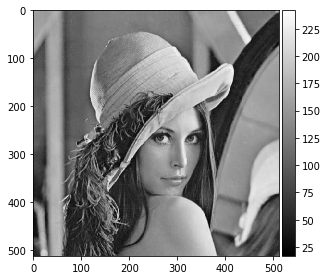

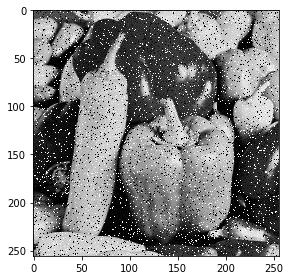

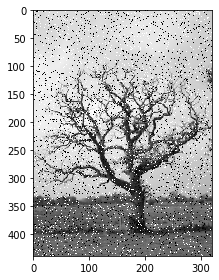

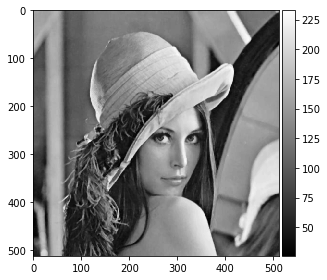

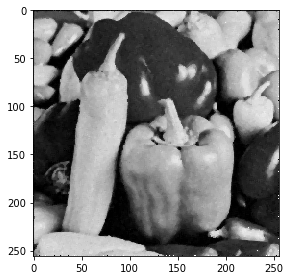

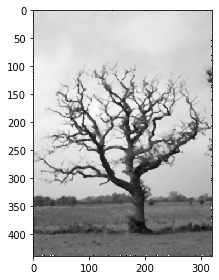

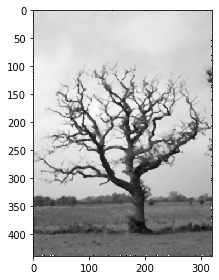

UnboundLocalError: local variable 'p' referenced before assignment

In [72]:
def medianFilter(in_image, filtersize, offset):
    copy_img = in_image.copy()
    width = copy_img.shape[0]
    height = copy_img.shape[1]
    
    # vector to hold pixels from 3x3 neighborhood
    P = np.zeros(filtersize * filtersize)
    
    for v in range(offset, height - offset):
        for u in range(offset, width - offset):
            # fill the pixel vector P for filter position u,v)
            k = 0
            for j in range(-int(filtersize / 2), int(filtersize/ 2)+1):
                for i in range(-int(filtersize / 2), int(filtersize/ 2)+1):
                    P[k] = copy_img[u+i][v+j]
                    k += 1
            # sort the pixel vector and take center element
            P = np.sort(P, kind='heapsort')
            in_image[u][v] = P[int(filtersize**2 / 2)]
    return in_image


# read img
img_1 = io.imread("A3/lena.jpg")
img_2 = io.imread("A3/pepper.jpg")
img_3 = io.imread("A3/tree.png")

# convert to grayscale
img_1 = ut.rgb2gray(img_1)

# plot img
ut.printImage(img_1)
ut.printImage(img_2)
ut.printImage(img_3)

# plot imgOut
imgOut_1 = medianFilter(img_1, 3, 1)
imgOut_2 = medianFilter(img_2, 3, 1)
imgOut_3 = medianFilter(img_3, 3, 1)
tmp_img = medianFilter(imgOut_3, 3, 1)


ut.printImage(imgOut_1)
ut.printImage(imgOut_2)
ut.printImage(imgOut_3)
ut.printImage(tmp_img)
for i in range(3):
    tmp_img = medianFilter(tmp_img, 3, 2)
ut.printImage(tmp_img)

### Teil 5

#### a) Vergleichen Sie die Ergebnisse der verschiedenen Filter miteinander und begründen Sie diese.

Der Beispielfilter aus dem Template ist ein Differenzfilter,
was bedeutet, dass Kanten besonders hervorgehoben werden.
Der Filter aus dem zweiten Teil ist ein Medianfilter,
welcher mit geringem Detailverlust beispielsweise ein Salz und Pfeffer Rauschen sehr effizient entfernen/ reduzieren kann.

#### b) Warum ist es beim Medianfilter sinnvoll für die Sortierung Heap Sort zu verwenden?

Heap Sort ist aus Sicht der Performance sinnvoller.
Hat weniger zu rechnen wenn es mehrere Wert mit gleichen/ähnlichen Werten gibt und ein Bild hat meistens ähnliche Werte.

#### c) Untersuchen Sie, welche Effekte bei mehrmaligem Anwenden eines Filters auf das jeweilige Ergebnisbild auftreten.

Auf Dauer gehen viele Informationen verloren (starke unschärfe/ Rauschen)

#### d) Welche Effekte treten bei großen und bei kleinen Filtermasken auf?

Medianfilter je größer der Filter:
mehr unschärfe, große Fehler aus dem Salz und Pfeffer Rauschen werden verstärkt